In [1]:
%load_ext autoreload
%autoreload 2
import physquirrel as sq
import random       
import numpy as np



**Generate a level-1 semi directed network**

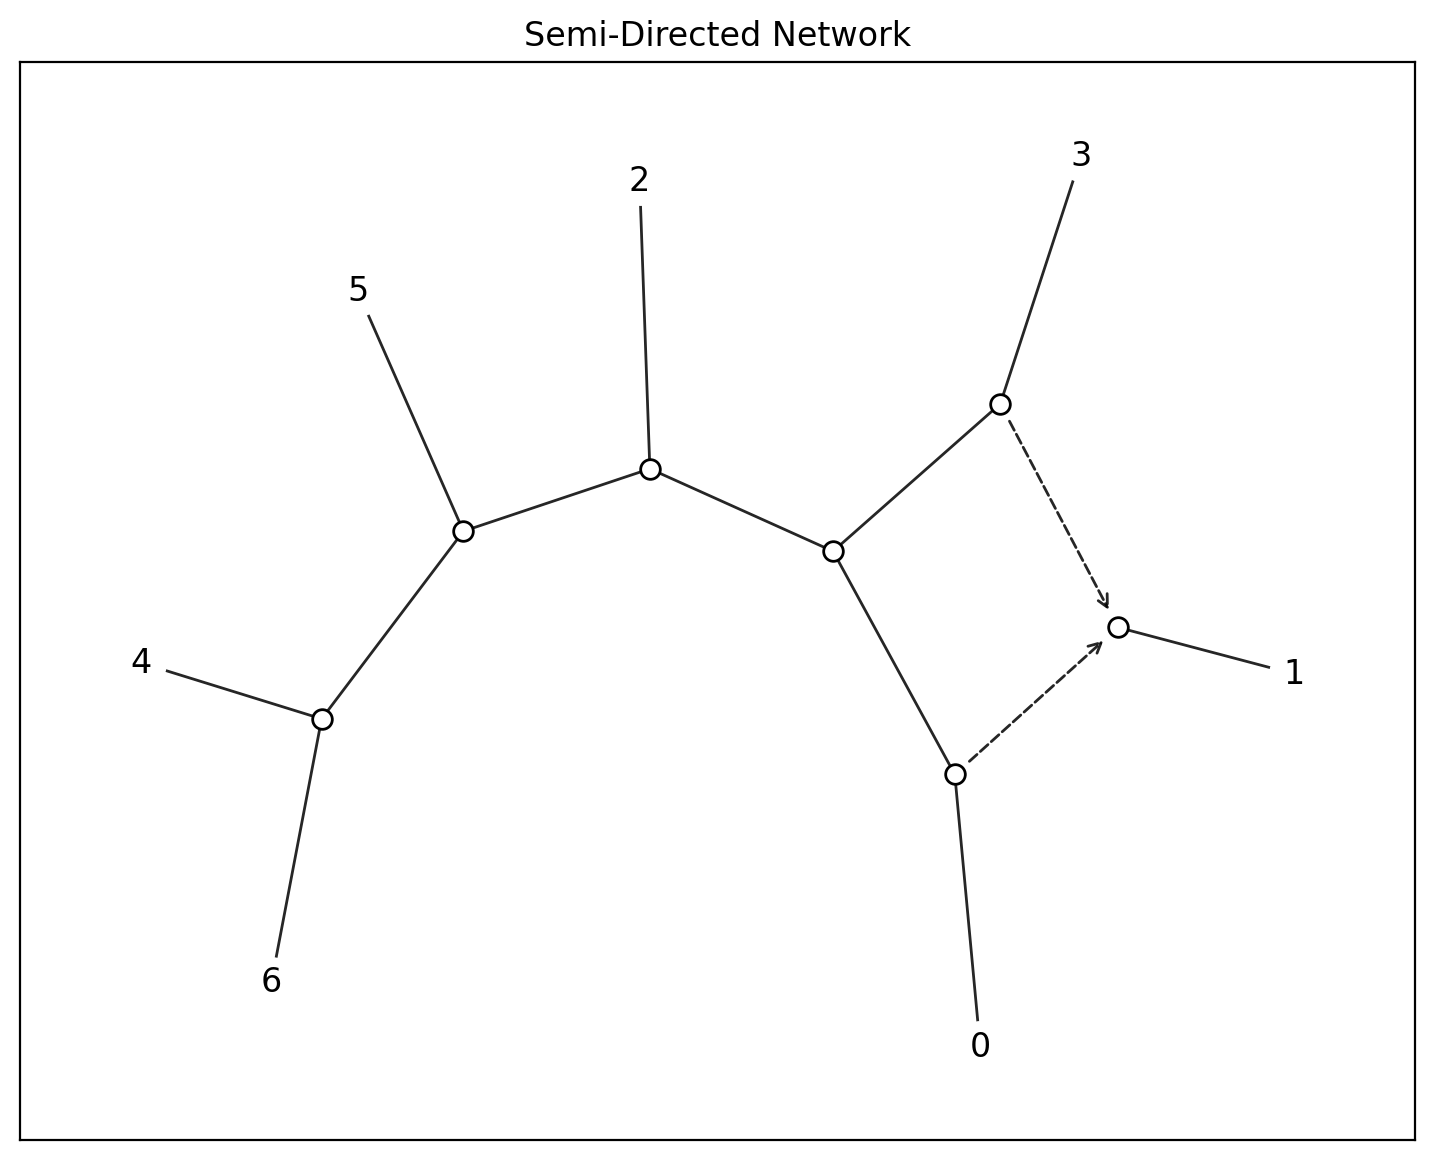

<Axes: title={'center': 'Semi-Directed Network'}>

In [2]:
seed = 348957
random.seed(seed)
np.random.seed(seed)
N = sq.sdnetwork.random_semi_directed_network(7, 1)
N.visualize()

**`Q` contains all induced quarnets of `N`**

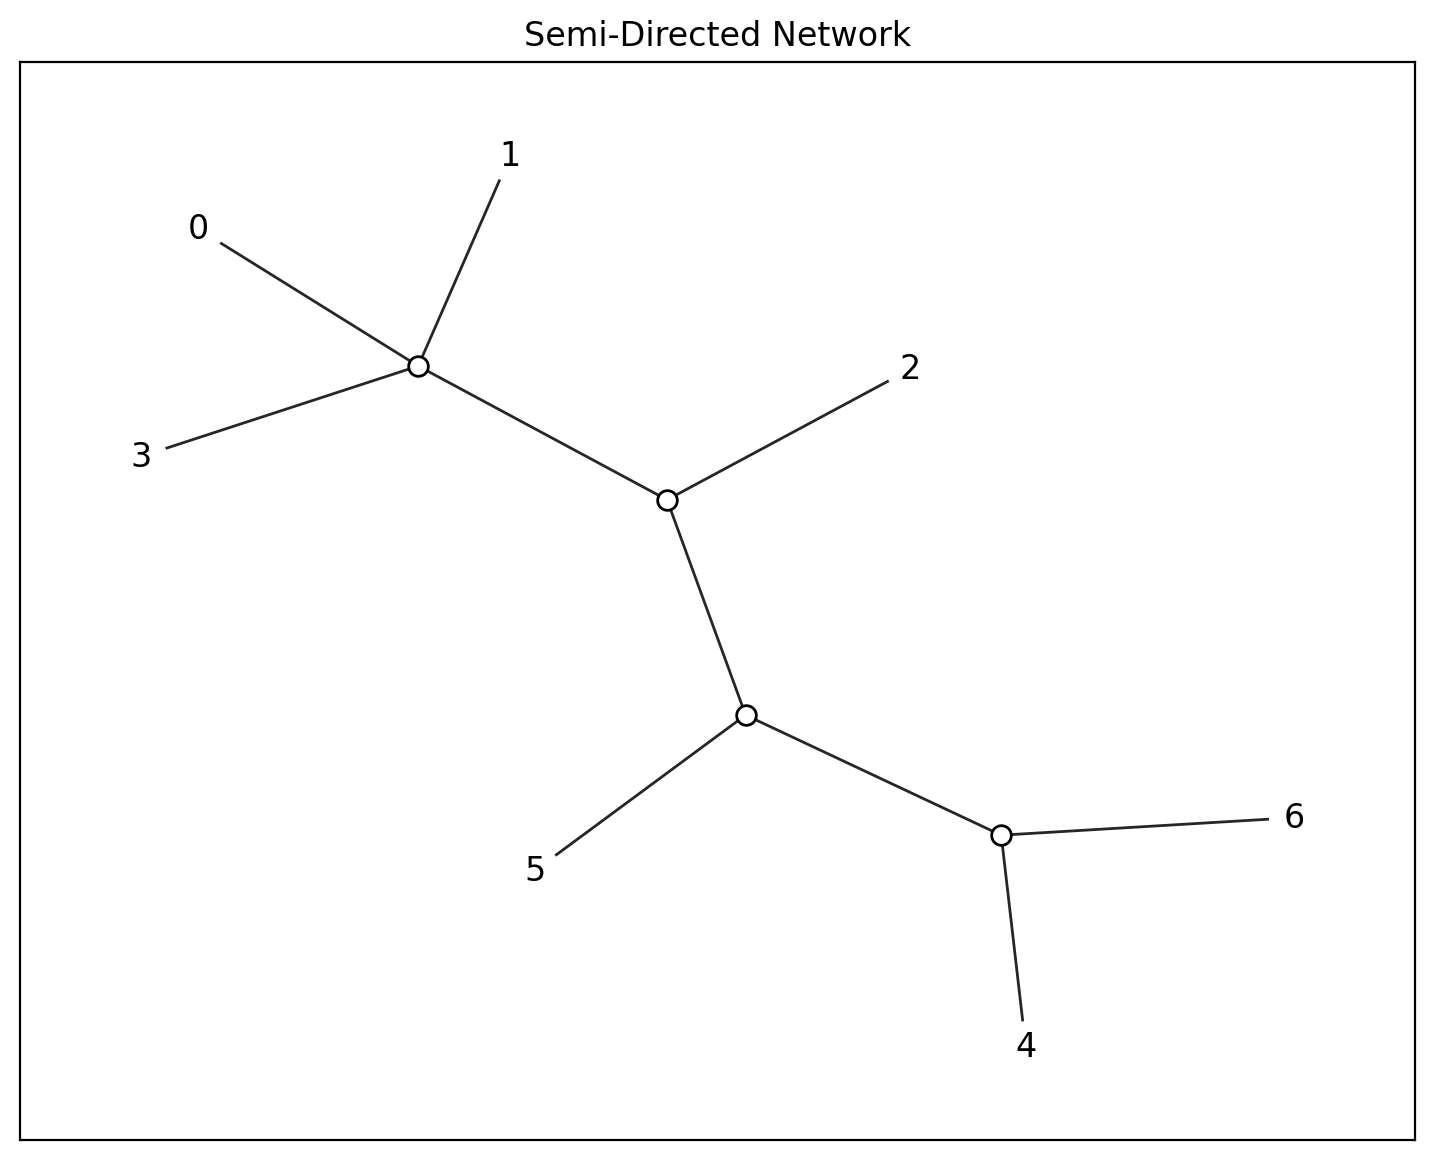

<Axes: title={'center': 'Semi-Directed Network'}>

In [3]:
Q, Q_splits = N.quarnets(triangles=False, return_4splits=True)
N_blob = N.blobtree()
N_blob.visualize()

**Change a portion of the quarnets in `Q` forming `Q_shake`**

In [7]:
Q_shake = Q._shake(epsilon=0)
Q_splits = Q_shake.quartetsplits()

sq_trees = Q_shake.squirrel(method = "return_trees", visualize=False)
print(Q_splits)
##OUR METHOD HERE##
print("____________________________")
my_trees = Q_splits.get_blobtrees_tstar_penalty(threshold=150)


QuartetSplitSet([Split({'4', '5'}, {'0', '3'}), Split({'4', '5'}, {'1', '3'}), Split({'6', '5'}, {'1', '2'}), Split({'4', '5'}, {'3', '2'}), Split({'5', '2'}, {'0', '3'}), Split({'5', '2'}, {'4', '6'}), Split({'6', '2'}, {'1', '3'}), Split({'4', '6'}, {'0', '1'}), Split({'5', '2'}, {'0', '1'}), Split({'1', '5'}, {'4', '6'}), Split({'6', '5'}, {'3', '2'}), Split({'6', '5'}, {'0', '2'}), Split({'4', '6'}, {'1', '3'}), Split({'4', '2'}, {'0', '1'}), Split({'0', '5'}, {'4', '6'}), Split({'4', '6'}, {'0', '3'}), Split({'1', '2'}, {'4', '6'}), Split({'3', '5'}, {'4', '6'}), Split({'6', '2'}, {'0', '3'}), Split({'4', '5'}, {'0', '1'}), Split({'6', '5'}, {'0', '1'}), Split({'5', '2'}, {'1', '3'}), Split({'3', '2'}, {'4', '6'}), Split({'0', '2'}, {'4', '6'}), Split({'6', '5'}, {'1', '3'}), Split({'4', '5'}, {'1', '2'}), Split({'4', '2'}, {'1', '3'}), Split({'6', '2'}, {'0', '1'}), Split({'4', '5'}, {'0', '2'}), Split({'4', '2'}, {'0', '3'}), Split({'6', '5'}, {'0', '3'})])
_____________________

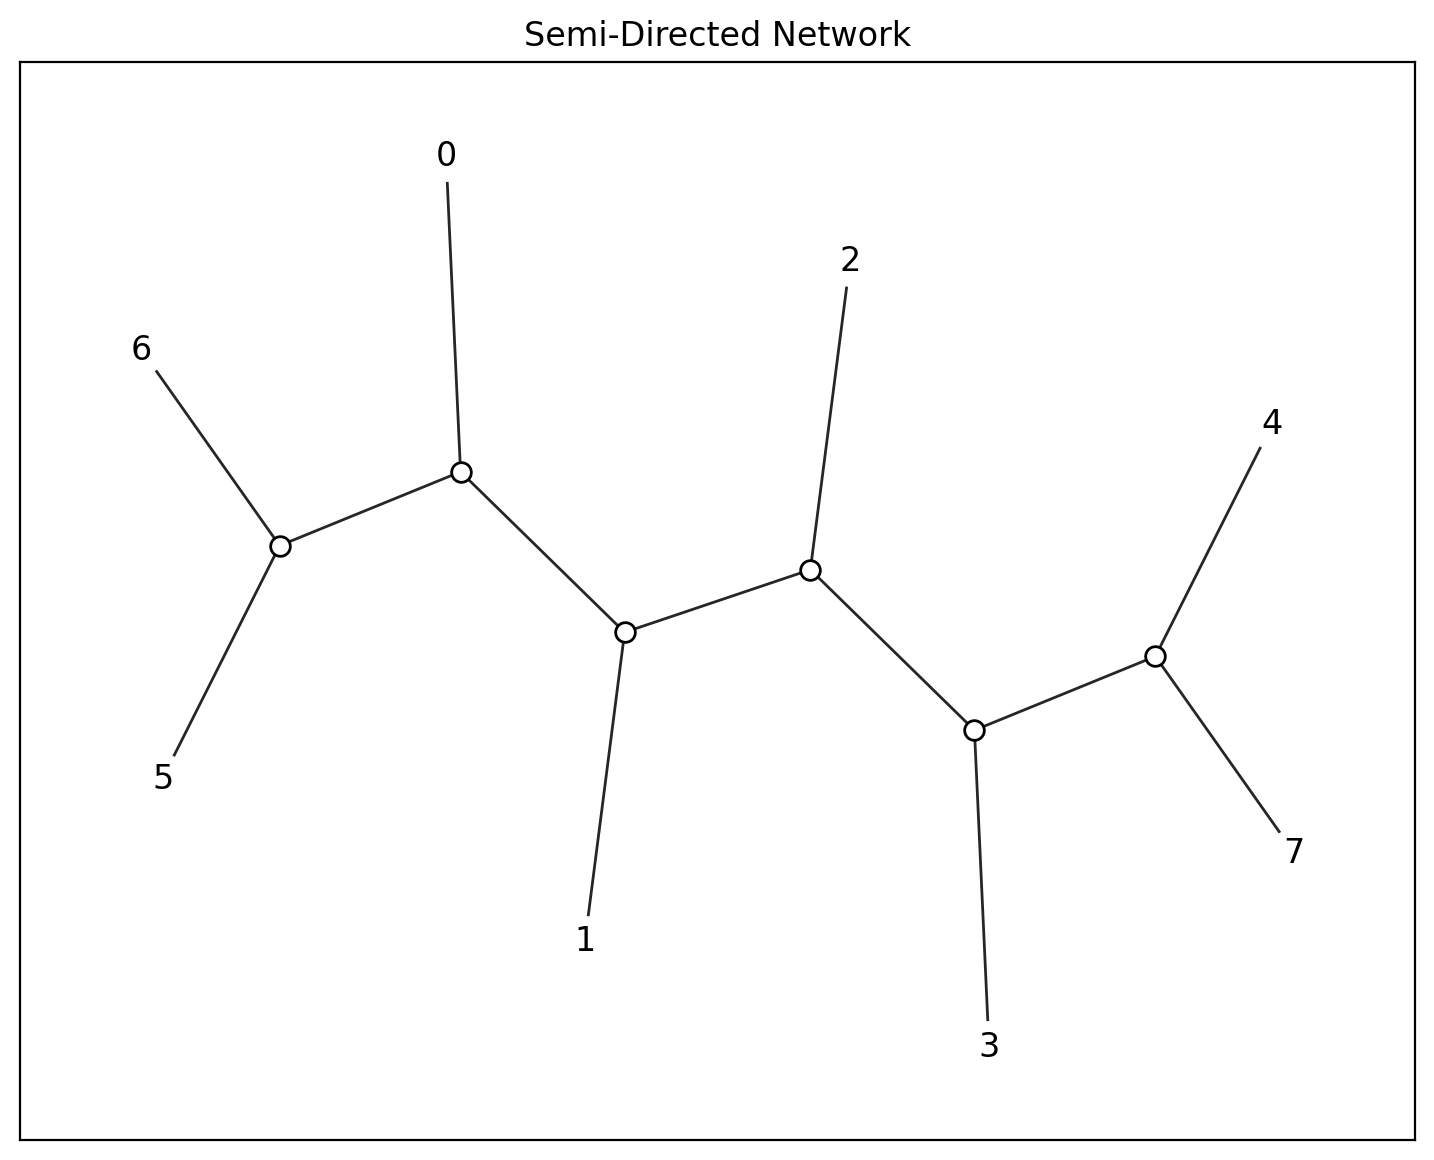

<Axes: title={'center': 'Semi-Directed Network'}>

In [103]:
tree, splitsystem = my_trees[-1].values()
tree.visualize()

In [104]:
sq_scores = []
my_scores = []

for tree in sq_trees:
    sq_score = tree.similarity(N_blob)
    sq_scores.append(sq_score)

for tree_obj in my_trees:
    tree = tree_obj["tree"]
    my_score = tree.similarity(N_blob)
    my_scores.append(my_score)


In [105]:
print(my_scores)
print(sq_scores)

[0.6666666666666666, 0.8275862068965517, 0.8936170212765957, 0.9180327868852459, 0.9285714285714286]
[0.9285714285714286, 1.0, 1.0, 1.0, 1.0, 0]
